# Preamble

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(style="white")

# Allows for interactive shell - outputs all non variable statements
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
np.set_printoptions(precision=4, linewidth=100)

from matplotlib import pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


In [2]:
import os
import shutil
from glob import glob
np.random.seed(10)

current_dir = os.getcwd()
DATASET_DIR=os.path.join(current_dir, 'dataset')
CROSSVALID_DIR=os.path.join(DATASET_DIR, 'cross_valid')
TRAIN_DIR = os.path.join(DATASET_DIR, 'train')
TEST_DIR = os.path.join(DATASET_DIR, 'test')
CROSSVALID_DIR = os.path.join(DATASET_DIR, 'cross_valid')
SAMPLE_DIR = os.path.join(DATASET_DIR, 'sample')

WEIGHTS_DIR = os.path.join(current_dir, 'weights')

# Use Keras Vgg16 to get the predictions

* Download the dataset in the current directory.
```
kg download -c 'dogs-vs-cats-redux-kernels-edition'
```
* Inspect the data
* Prepare a single image
* Feed it into pretrained vgg16

## Inspect the data

Graph the image

(0.0, 1.0, 0.0, 1.0)

Text(0.5,1,'dataset/train/cat/cat.1.jpg')

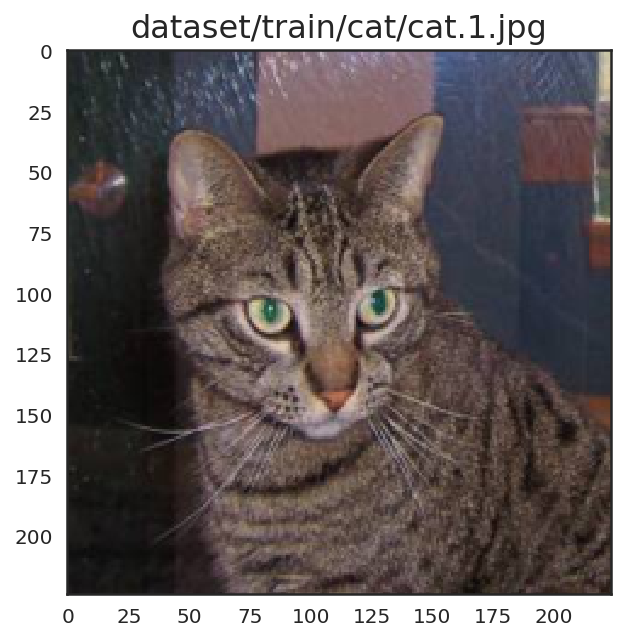

In [6]:
# Unzip a single file to test on the pretrained model
#!unzip -oj "test.zip" "test/1.jpg" -d "/tmp/cats_dogs"

# Load the image
# img_path = '/tmp/cats_dogs/1.jpg'
img_path = 'dataset/train/cat/cat.1.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Plot the single image
f = plt.figure(figsize=(10, 5))
sp = f.add_subplot(1, 1, 1) ## (rows, cols, index)
sp.axis('On')
sp.set_title(img_path, fontsize=16)
plt.imshow(img)

## Predict using Keras Vgg16

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
decode_predictions(preds)

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
decode_predictions(preds)

# Kaggle Competition

1. Prepare dataset
    1. Download the dataset
    1. Unzip training and test dataset
    1. Create the training, validation, sample batch dataset
    1. Create the labels
1. Model preparation
    1. Finetune the keras model
       1. Pop the last layer, freeze all layers, add a softmax layer and update set of classes
    1. Fit the keras model
       1. Train the updated keras model
    1. Save and load the model after couple of epochs
1. Perform predictions
1. Debug
   1. View the confusion matrix
   1. Visual Inspection
       1. Inspect correct labels
       1. Inspect incorrect labels
       1. Inspect correct labels with high probability
       1. Inspect incorrect label with high probability
       1. Inspect correct labels with medium probability
1. Kaggle Submission
    1. Prepare csv file
    1. Submit

## Prepare dataset

See `lesson1_catsdogs-prepare_dataset.ipynb` which will download and create the various labeled datasets.

## Perform predictions

In [ ]:
model.load_weights(os.path.join(WEIGHTS_DIR, 'intial_sample_run_2.h5'))

def get_data_as_np(path, batch_size=5):
    batches = datagen.flow_from_directory(
        path,
        target_size=(224, 224),
        batch_size=10,
        class_mode=None,
        shuffle=False
    )
    return np.concatenate([batches.next() for i in range(len(batches))])

model.predict(get_data_as_np(crossvalid_dir, 5), batch_size=5)


In [ ]:

test_batches = self.get_batches(path, shuffle=False, batch_size=batch_size, class_mode=None)
test_batches, self.model.predict_generator(test_batches, test_batches.nb_sample)

preds[1:4]
preds.shape